<h3 style="color:red;">Term neonate of 38 weeks of gestation and 3.3 kg at 48 hours</h3>


In [5]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

factor = 1.0
model.models["LA"].el_min_factor = factor
model.models["LV"].el_min_factor = factor
model.models["RA"].el_min_factor = factor
model.models["RV"].el_min_factor = factor

# stabilize the model by calculating 120 seconds
neo.calculate(120)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 6.8 sec. Average model step in 0.0285 ms.


<h5 style="color:red;">Model run results</h5>

In [6]:
# get the pressures, flows and volumes from a 60 second model run.
neo.validate()

Heart.heart_rate: max  141.47281 min  140.97683
AA.pres         : max   70.71113, min   45.75496 mmHg
LA_LV.flow      : net  240.62276, forward  240.62276, backward        0.0 ml/kg/min, stroke volume:    1.70653 ml/kg, 
RA_RV.flow      : net  237.80759, forward  237.80759, backward        0.0 ml/kg/min, stroke volume:    1.68656 ml/kg, 
SVC_RA.flow     : net  103.97372, forward  110.63279, backward   -6.65907 ml/kg/min, stroke volume:     0.7374 ml/kg, 
AAR_AD.flow     : net  132.86424, forward  135.07374, backward    -2.2095 ml/kg/min, stroke volume:    0.94229 ml/kg, 
LV.vol          : max    2.51518, min     0.7848 ml/kg


<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="450"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="450"></img><br>
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img> -->

<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [7]:
# get additional model data, heartrate and resp_rate in beats and breaths per minute, pressures in mmHg, po2 and pco2 in kPa, hco3 and base excess (be) in mmol/l
neo.get_vitals()

{'heartrate': 141.4179992272736,
 'spo2_pre': 96.23072499401476,
 'spo2_post': 95.8008918732249,
 'abp_systole': 70.54681,
 'abp_diastole': 45.8029,
 'pap_systole': 40.88641,
 'pap_diastole': 17.96232,
 'cvp': 2.178667103,
 'resp_rate': 41.78699728441455,
 'pH': 7.398106720884065,
 'po2': 10.19049740183193,
 'pco2': 5.681238037814413,
 'hco3': 25.967690944352363,
 'be': 0.6677135092919764}

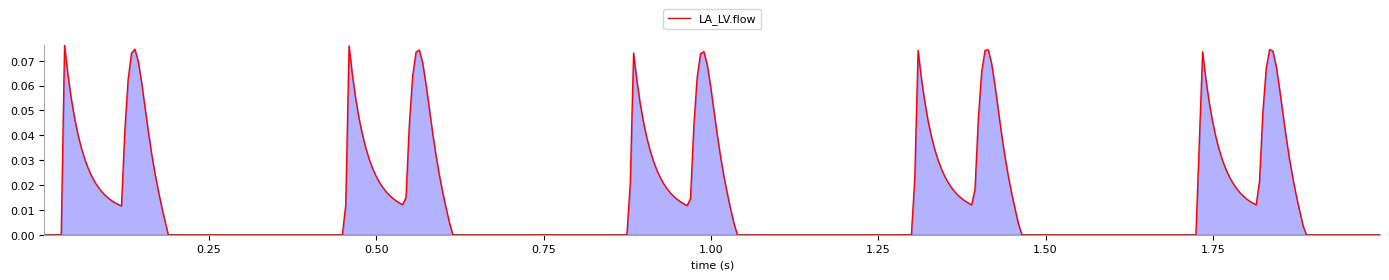

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  838.00325, forward  838.00325, backward        0.0 ml/min, stroke volume:    5.92852 ml, 


In [8]:
neo.plot_time_graph(["LA_LV.flow"], time_to_calculate=2)

In [9]:
neo.get_total_blood_volume()

Total blood volume: 78.53287385460041 ml/kg = 100.0%
Systemic blood volume: 69.70762480601856 ml/kg = 88.76235057318628%
Pulmonary total blood volume: 8.825249048581838 ml/kg = 11.237649426813714%
Pulmonary capillary blood volume: 3.552717246842225 ml/kg = 40.256283163058434% of total pulmonary blood volume
Heart blood volume: 4.980192709417745 ml/kg = 6.341538854974692%
Capillary blood volume: 4.125529516114809 ml/kg = 5.253251681267918%
Venous blood volume: 49.685176589948405 ml/kg = 63.26672404977561%
Arterial blood volume: 10.863392657204267 ml/kg = 13.832923875060633%
Upper body blood volume: 21.420823206734866 ml/kg = 27.27625025717819%
Lower body blood volume: 43.253275556532614 ml/kg = 55.07664934892597%


0.2591584837201813